In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10,8]


In [5]:
import nfwfitter.nfwnoise as nfwnoise
import nfwfitter.nfwutils as nfwutils
import nfwfitter.varcontainer as varcontainer
import nfwfitter.basicMassCon as basicMassCon
import nfwfitter.nfwfit as nfwfit
import nfwfitter.simutils as simutils

In [6]:
def precision(true_mass, zcluster, beta_s, ngalsperarcmin, r_mpc_min, r_mpc_max):
  
    m200s = np.arange(-5.05e14, 3e15, 1e13)
    r_mpc_edges = np.linspace(r_mpc_min, r_mpc_max, 13)
    r_mpc = (r_mpc_edges[1:] + r_mpc_edges[:-1])/2.

    duffy = basicMassCon.Duffy()
    c_duff = duffy(true_mass * nfwutils.global_cosmology.h, zcluster, 200.)


    g_truth = nfwnoise.createPerfectProfile(true_mass, c_duff, zcluster, r_mpc, beta_s)


    r_arcmin_edges = (r_mpc_edges/nfwutils.global_cosmology.angulardist(zcluster))*(180./np.pi)*60
    bin_areas = np.pi*(r_arcmin_edges[1:]**2 - r_arcmin_edges[:-1]**2)
    ngals_per_bin = ngalsperarcmin * bin_areas
    g_err = 0.25 / np.sqrt(ngals_per_bin)


    #calcualte pdf for duffy

    config = {}
    config['model'] = nfwfit.NFW_MC_Model()
    config['massconRelation'] = basicMassCon.Duffy()
    simutils.runConfigure(config)


    likelihood = nfwnoise.Likelihood(config)
    likelihood.bindData(r_mpc, g_truth, g_err, beta_s, zcluster)


    duffy_logpdf = np.array([likelihood(m200) for m200 in m200s])
    duffy_pdf = np.exp(duffy_logpdf - np.max(duffy_logpdf))
    duffy_pdf = duffy_pdf / np.trapz(duffy_pdf, m200s)
    
    mean_m200 = np.trapz(m200s*duffy_pdf, m200s)
    std_m200 = np.sqrt(np.trapz(duffy_pdf*(m200s-mean_m200)**2, m200s))
    
    return std_m200

0.5
[]
0.5
[]
0.5
[]
0.5
[]


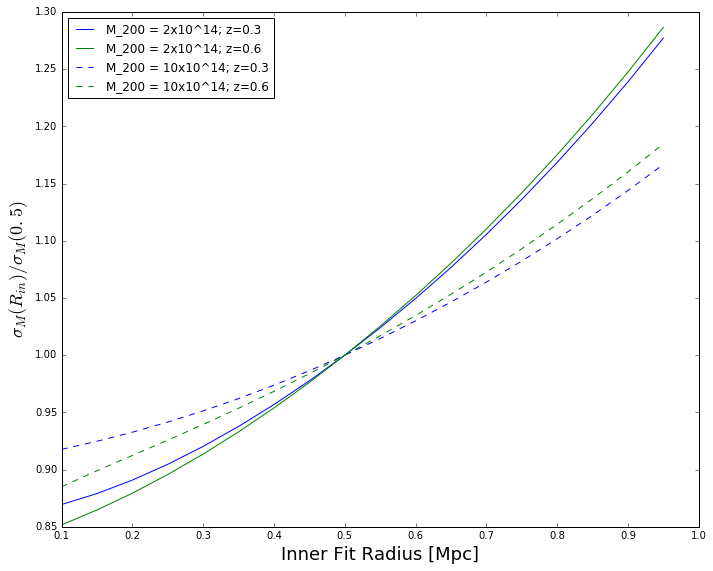

In [9]:
true_masses = [2e14, 1e15]
zclusters = [0.3, 0.6]
linestyles = ['-', '--']
colors = ['b', 'g']
duffy = basicMassCon.Duffy()

zcluster = 0.415 #median of megacam
beta_s = 0.49 #median of megacam
ngalsperarcmin = 9.7 #median of megacam set

for true_mass, linestyle in zip(true_masses, linestyles):
    
    for zcluster, color in zip(zclusters, colors):
    
        r_ins = np.arange(0.1, 1., 0.05)
        std_m200s = np.array([precision(true_mass, zcluster, beta_s, ngalsperarcmin, r_in, 2.5) for r_in in r_ins])/true_mass
        print r_ins[8]
        plt.plot(r_ins, std_m200s/std_m200s[8], linestyle=linestyle, c=color, label='M_200 = {:d}x10^14; z={:1.1}'.format(int(true_mass/1e14), zcluster))
    
        print std_m200s[r_ins == 0.75]
    
plt.legend(loc='upper left')
plt.xlabel('Inner Fit Radius [Mpc]', fontsize=18)
plt.ylabel(r'$\sigma_M(R_{in})/\sigma_M(0.5)$', fontsize=18)
plt.tight_layout()
plt.savefig('relativenoise.png')


        

    


      

In [8]:
print 30./np.sqrt(19), (30.*1.1)/np.sqrt(19)

6.88247201612 7.57071921773
